# <font color = "red">[READ THIS] Before you start</font>
Welcome to UpLevel mini-projects! In this series, you're challenged to independently work (with our guidance) with data that you will collect to UpLevel yourself. 

We hope you're excited to embark on this adventure.
### Warning:
This isn't just any coding course or programmes, where you receive helper code as you move from one code block to another. 

This is when things get <em>real</em>.

In this project, you will receive instructions to execute a task along with an intended outcome. Most importantly, we will provide you with directions you can go to, to pick up code independently and implement it in this notebook.

Don't worry though, we'll be dropping lots of resources you can consult and these readings will contain everything you need to succeed. You can also perform independent research to find answers independently. You just have to read closely and pick out the parts that make most sense. 

<strong>We make you do this not because we're lazy bastards but because being able to indepedently find code is a highly underrated skill and that's something all companies look out for.</strong>

If you're really stuck and are on the verge of giving up, we gotchu fam. Head on over to https://www.facebook.com/UpLevelSG/ and post your questions there. 

### What we'll be doing:
In this project, we will do the following:

1. Call the taxi availability API from Data.gov.sg to collect taxi data (Part I)
2. Perform data cleaning (Part II)
3. Perform exploratory data analysis (Part III)
4. Train a machine learning model to  (Part IV)

### Expectations:
We're not going to sugarcoat it - it'll be challenging at times. You have to promise to put in the time and effort to UpLevel yourself. 

But we promise you that it'll ultimately be fun and rewarding, and you'll come out of it stronger and more confident than before.

# Introduction

In Singapore, all of the taxis are connected to a central system that tracks their positions at all times. It's even cooler because the Singaporean government collects these data and anyone - including you - can obtain the data for analysis. 

We will collect the data for one month in 2019, and perform analysis, followed by modelling. 

In this notebook, you will do the following:
1. Import your pandas library
2. Call the Taxi Availability API from Data.gov.sg
3. Organize the JSON data
4. Export your DataFrame as a CSV file 

### Step 1: Import the following library
- pandas
- requests

In [3]:
import nbformat

In [4]:
nbformat.read?

Signature: nbformat.read(fp, as_version, **kwargs)
Docstring:
Read a notebook from a file as a NotebookNode of the given version.

The string can contain a notebook of any version.
The notebook will be returned `as_version`, converting, if necessary.

Notebook format errors will be logged.

Parameters
----------
fp : file or str
    A file-like object with a read method that returns unicode (use
    ``io.open()`` in Python 2), or a path to a file.
as_version: int
    The version of the notebook format to return.
    The notebook will be converted, if necessary.
    Pass nbformat.NO_CONVERT to prevent conversion.

Returns
-------
nb : NotebookNode
    The notebook that was read.
File:      c:\users\azuka\anaconda3\lib\site-packages\nbformat\__init__.py
Type:      function


In [1]:
from IPython.display import HTML

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [10]:
# Step 1: Import the libraries you need
import numpy as np
import pandas as pd
import requests
from tqdm import tqdm
# from urllib.request import Request, urlopen, urlretrieve
# from urllib.parse import urlencode, urlparse
import json

### Step 2: Visit the API website
Head on to https://data.gov.sg/dataset/taxi-availability to check out the API.

When you load the page (accurate as of Jun 2020), there are a few things to take note of in this page:

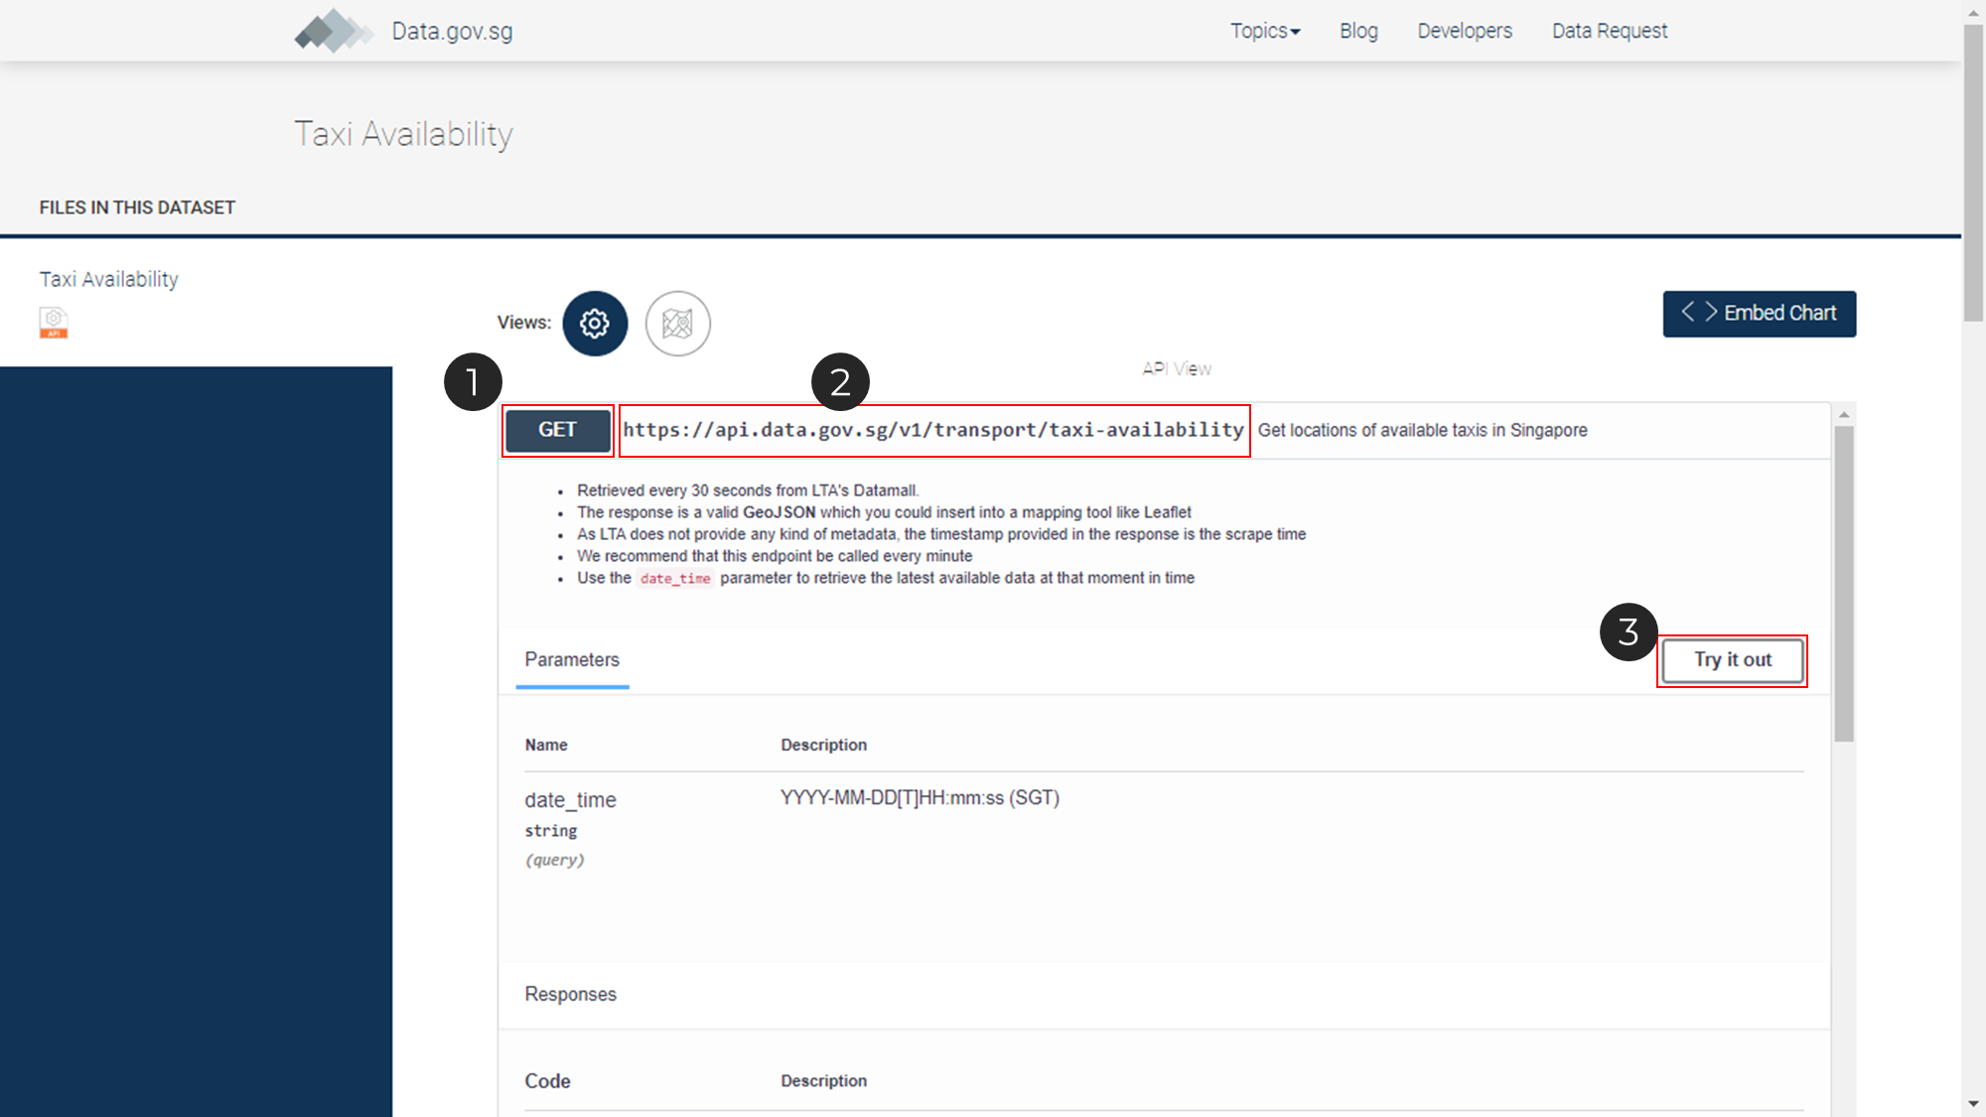

1. The command to use for your API call (more details later)
2. The API URL for the latest taxi availability
3. A button that lets you try to call the API in the browser

Notice that there is a "Parameter" section as well, but we'll come to that later.

### Step 3: Click on "Try it out"
Let's give the API a spin. In the page, try the following:
1. Click "Try it out"
2. Click "Execute"

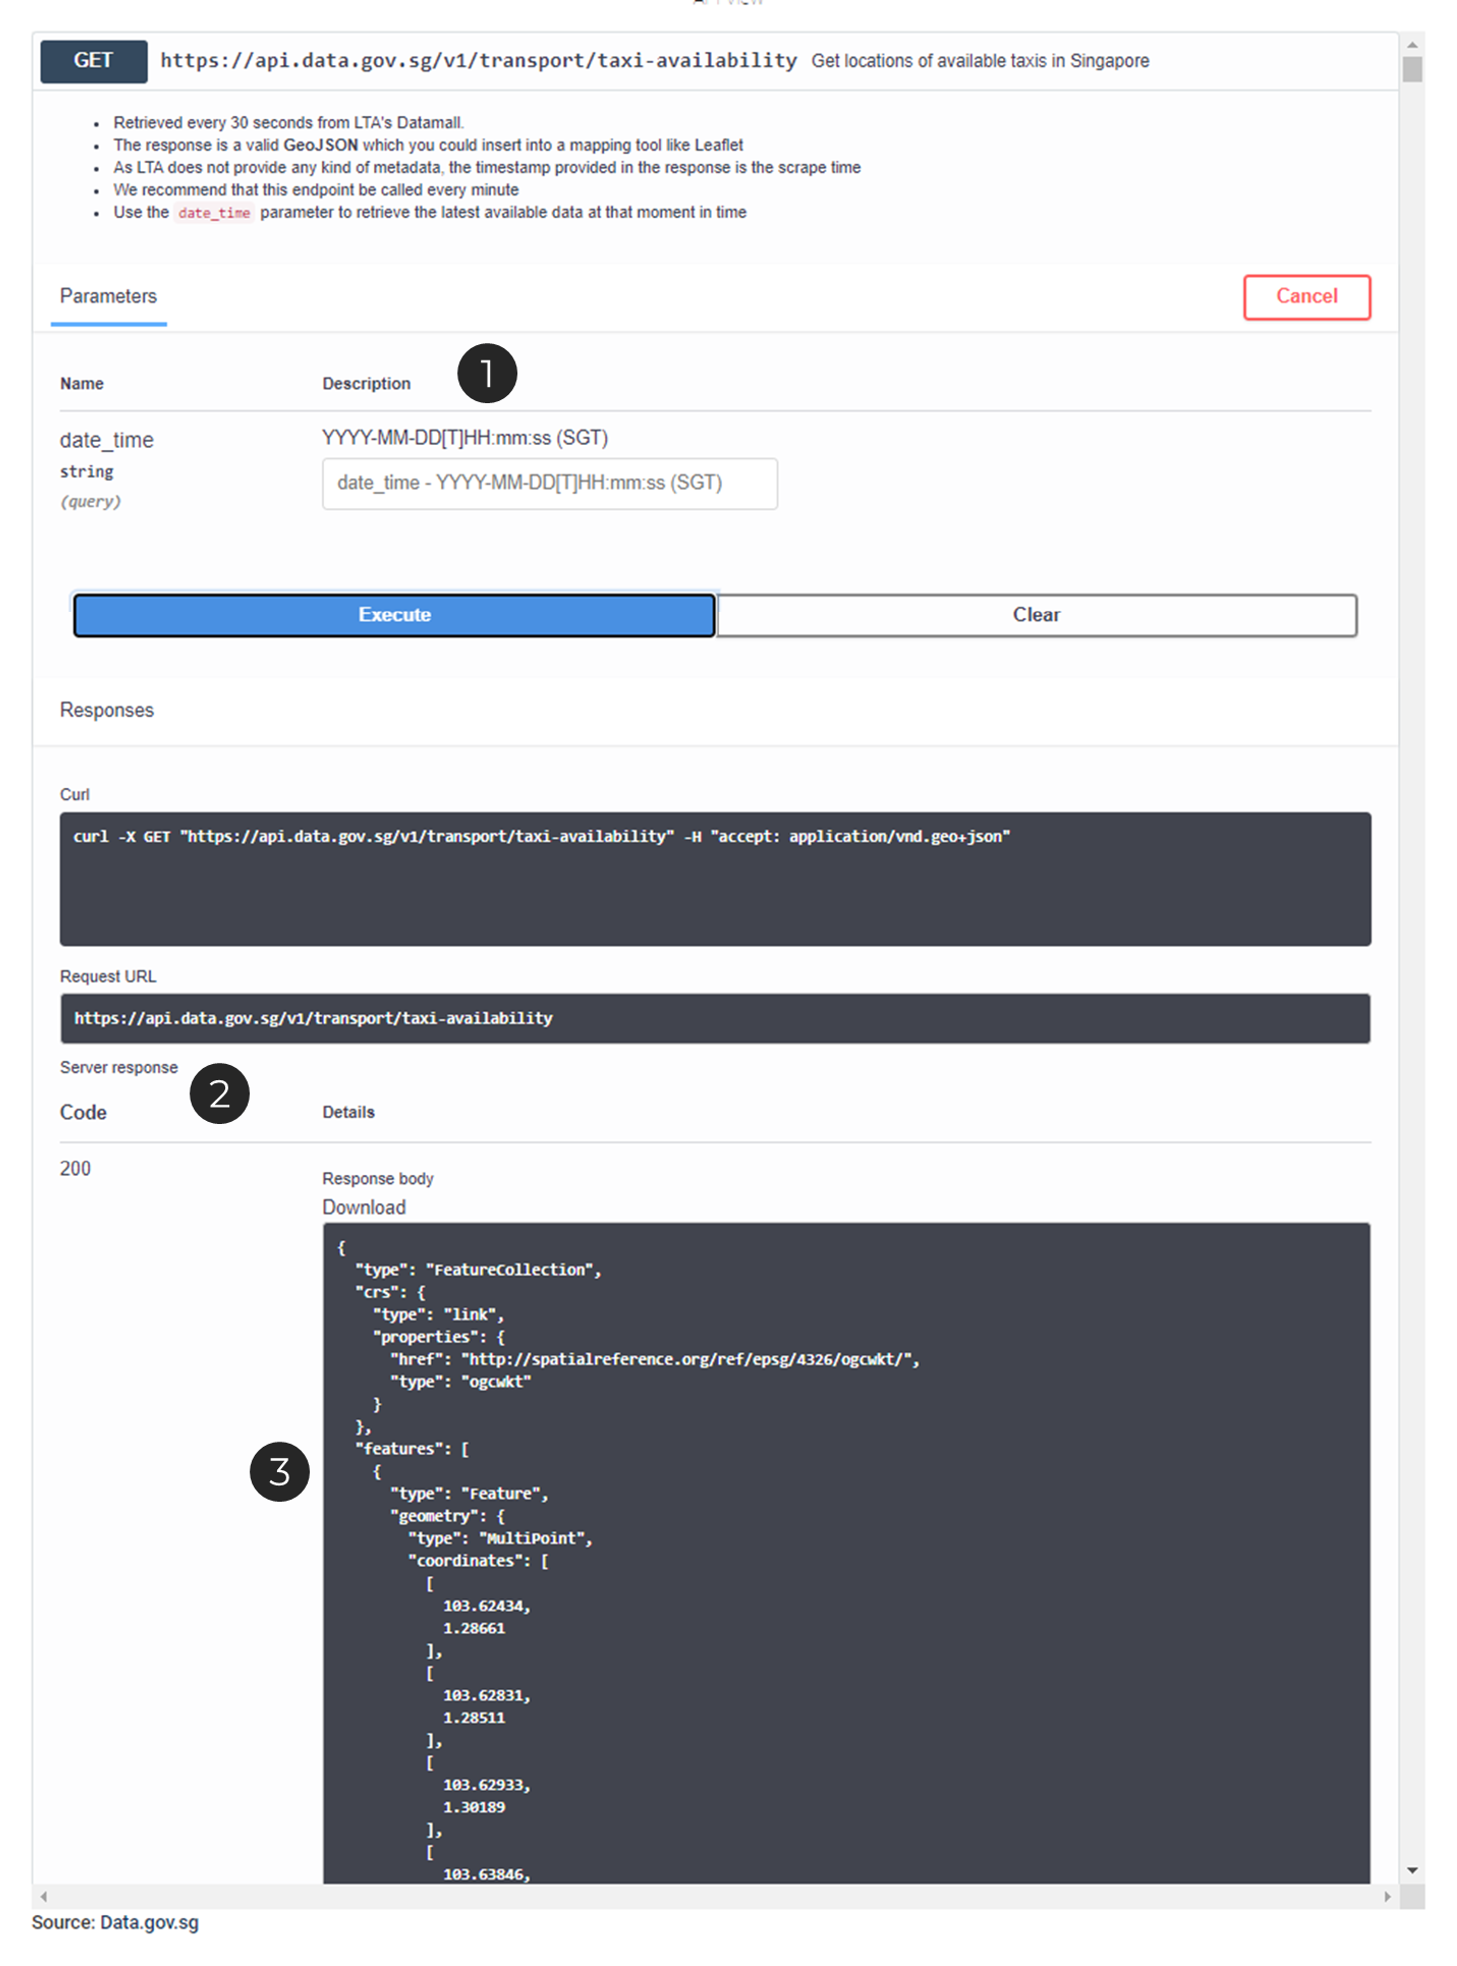

The window below expands, exposing three new things:
1. A text box where you can fill in with a string containing time
2. A new section, one in particular titled "Request URL"
3. The response of the API

One thing you can also try is entering the "Request URL" in your browser and see what you get! 

### Step 4: Add a date into the text box containing time
This is important because currently whenever you execute Step 3, you're getting the latest taxi availability. However, for this project we'll be collecting only the entire month of January in 2019. 

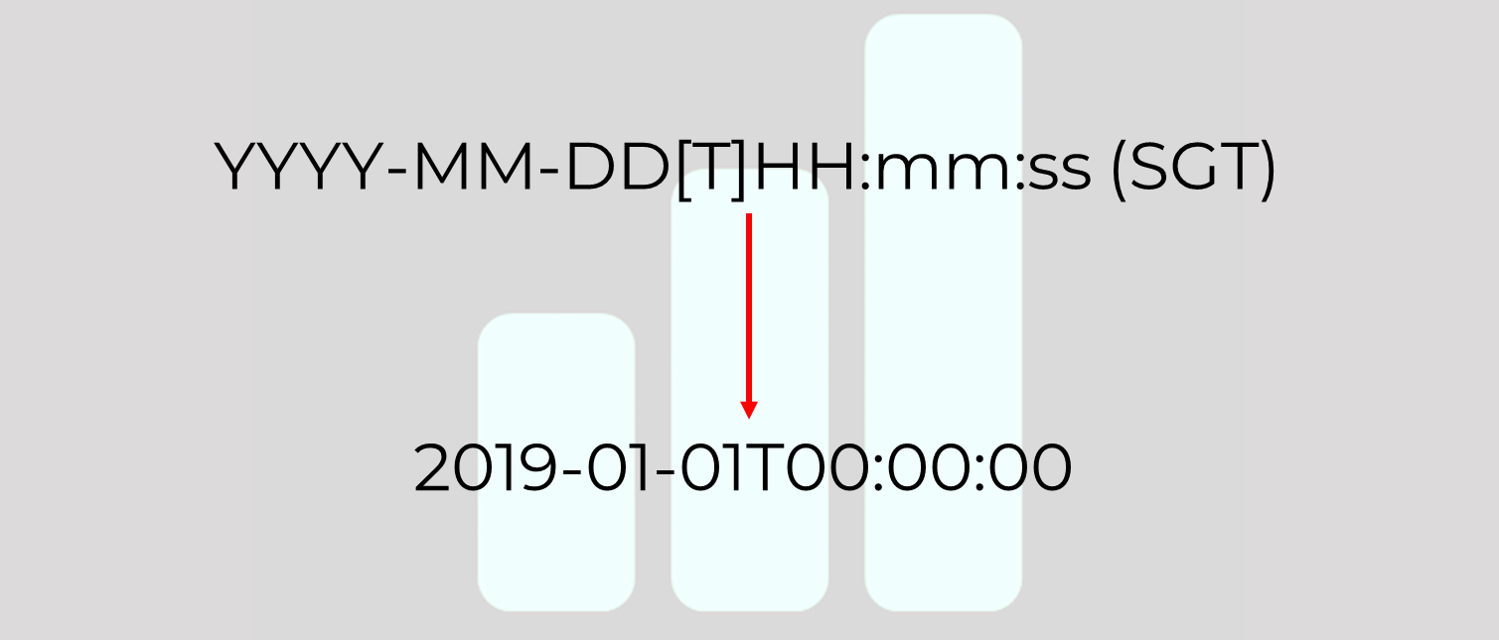

1. YYYY = year in four numbers
2. MM = zero-padded months, e.g., 01 vs 12 for Jan and Dec respectively
3. DD = zero-padded days, e.g., 01 to 31
4. HH = hour in 24-hour format, e.g., 00 t0 23
5. mm = zero-padded minutes, e.g., 00 t0 59
6. ss = zero-padded seconds, e.g., 00 to 59

Note: The [T] in the middle is telling you to put the string T in between the date and the time. 

Once you execute this, we will be using the URL for our API call using Python in Step 5.

### Step 5: Test with one API call first with requests
Now that we've seen how it's done on the browser, we will be using Python to make an API call. 

If this is the first time you're making an API call, or you're unsure on how to make an API call, here's a handy resource: https://www.dataquest.io/blog/python-api-tutorial/

Here are what you need to do:
1. use requests to get the response of the URL that you found from Step 4
2. save the response in a variable
3. use .json() to get the JSON data

#### This is the expected output of the API call if you did it correctly
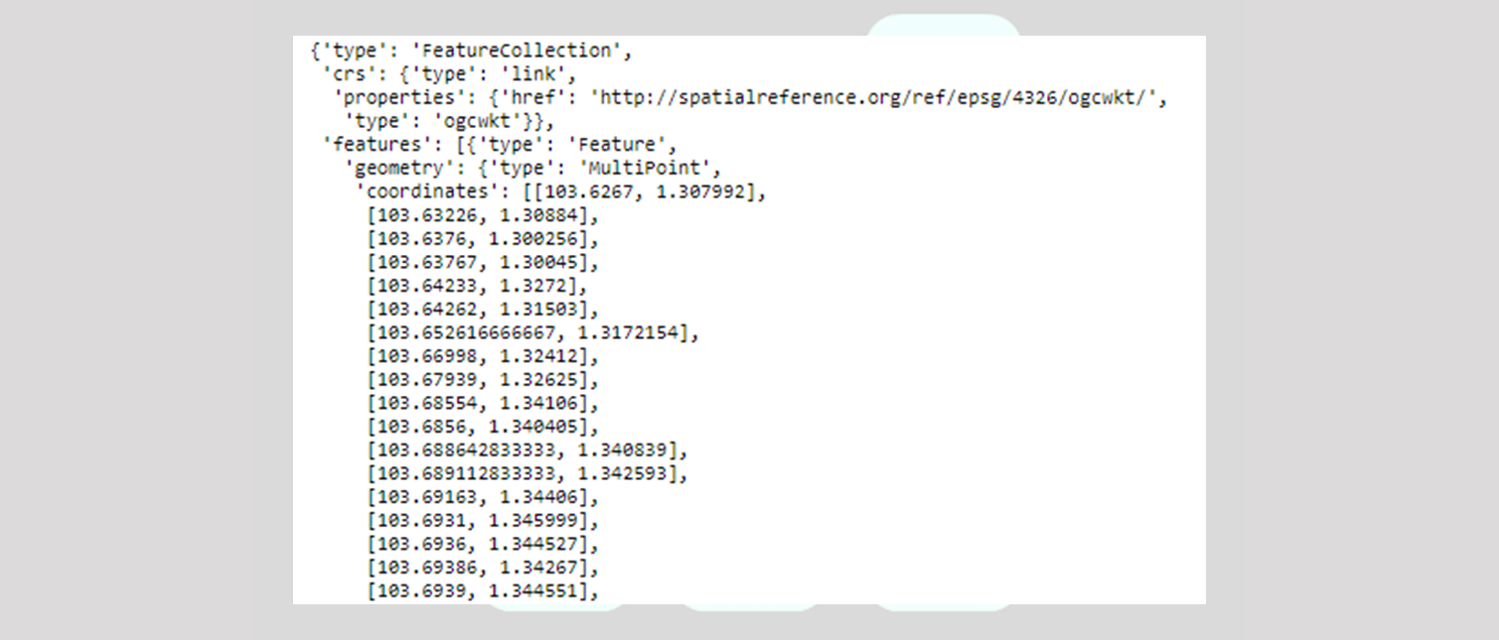

In [2]:
url = 'https://api.data.gov.sg/v1/transport/taxi-availability?'
mydict = {'date_time': '2019-01-01T00:00:00'}
response = requests.get(url, params=mydict)
data = json.loads(response.text)
# data

In [3]:
pd.json_normalize(data['features'])

type geometry.type                               geometry.coordinates  \
0  Feature    MultiPoint  [[103.6267, 1.307992], [103.63226, 1.30884], [...   

        properties.timestamp  properties.taxi_count properties.api_info.status  
0  2018-12-31T23:59:44+08:00                   5887                    healthy

### Step 6: Turn the JSON response to a DataFrame
We'll practise turning a JSON response into a DataFrame directly first.

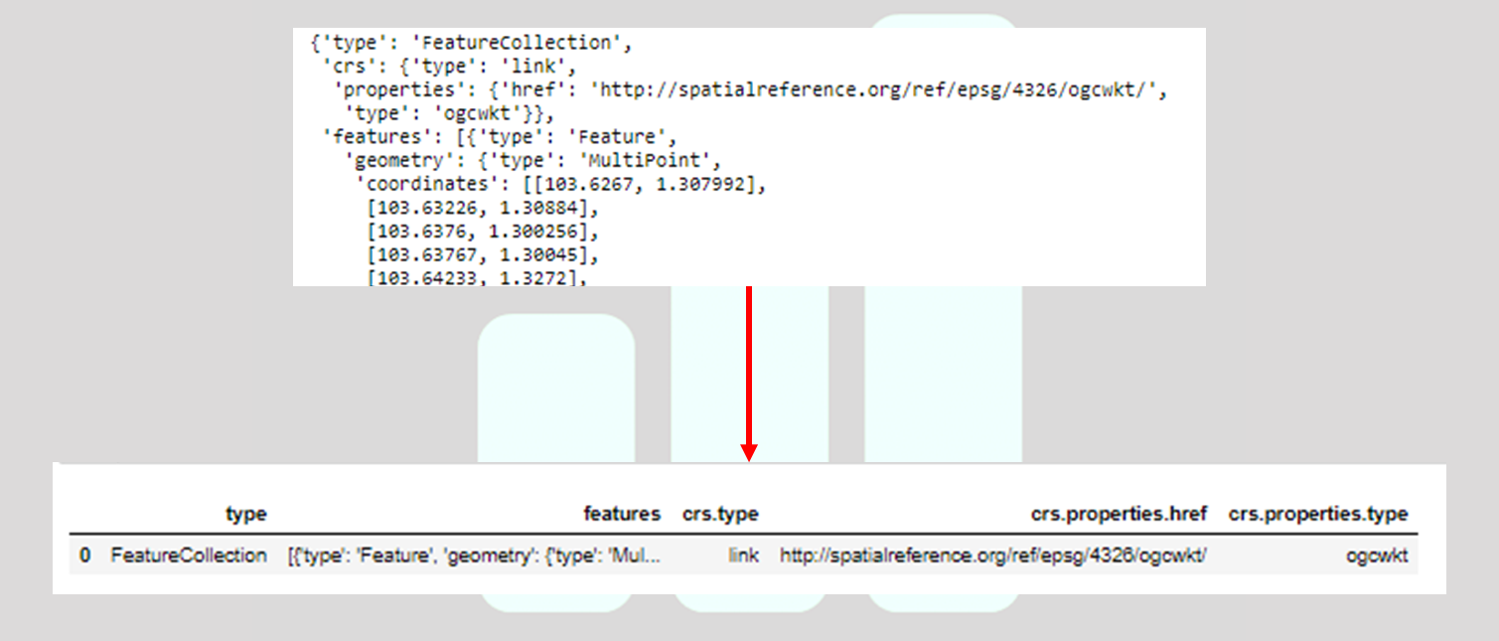

<strong>Hint: Google "turn json response to dataframe"</strong>

<strong>Hint 2: Pandas has something useful for you</strong>

In [ ]:
# Step 6: Turn the JSON response directly into a DataFrame

### Step 7: Get the JSON's "features" only
Wait a minute, where are the coordinates? Turns out we turned the JSON object too directly into a DataFrame. As such, we dig in deeper and get only the values from "features". 

Think of JSON as a huge dictionary, and take only the values from "features". 

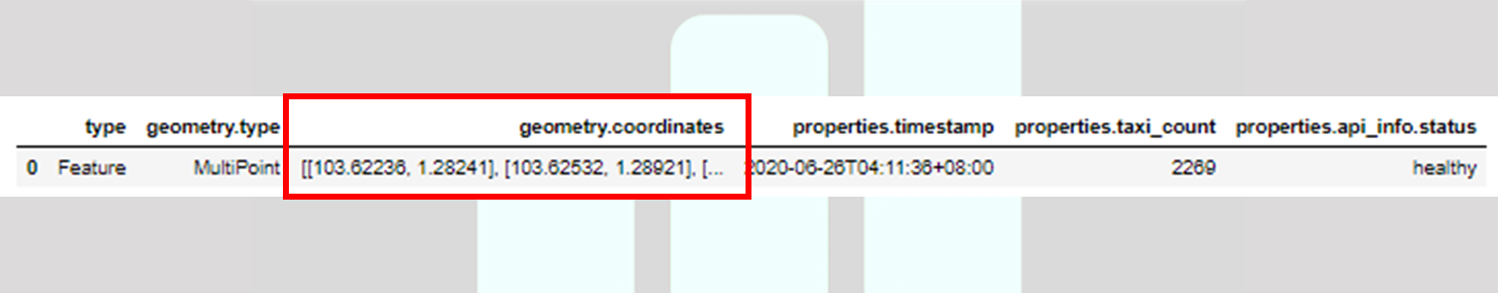

This is what you'll see if you turn only the 'features' part of the JSON into a DataFrame! 

<strong>Hint: Google on ways to get values from dictonaries using keys</strong>

In [ ]:
# Step 7a: Declare a new variable that contains only your 'features' from the JSON

# Step 7b: Turn it into a DataFrame

### Step 8: Dissect the API call to get a pattern
Okay, now that we're successful in turning the JSON into a DataFrame containing one row, we can now proceed with calling the rest of the month of January 2019. 

We want to be granular, but not too granular so we will be getting 5-min interval data. For example:
1. Starts at 2019-01-01T00:00:00
2. Next one is 2019-01-01T00:05:00
3. We go on until 2019-01-31T00:00:00

Of course, we will have to automate it - it looks so tedious if we did it manually. 

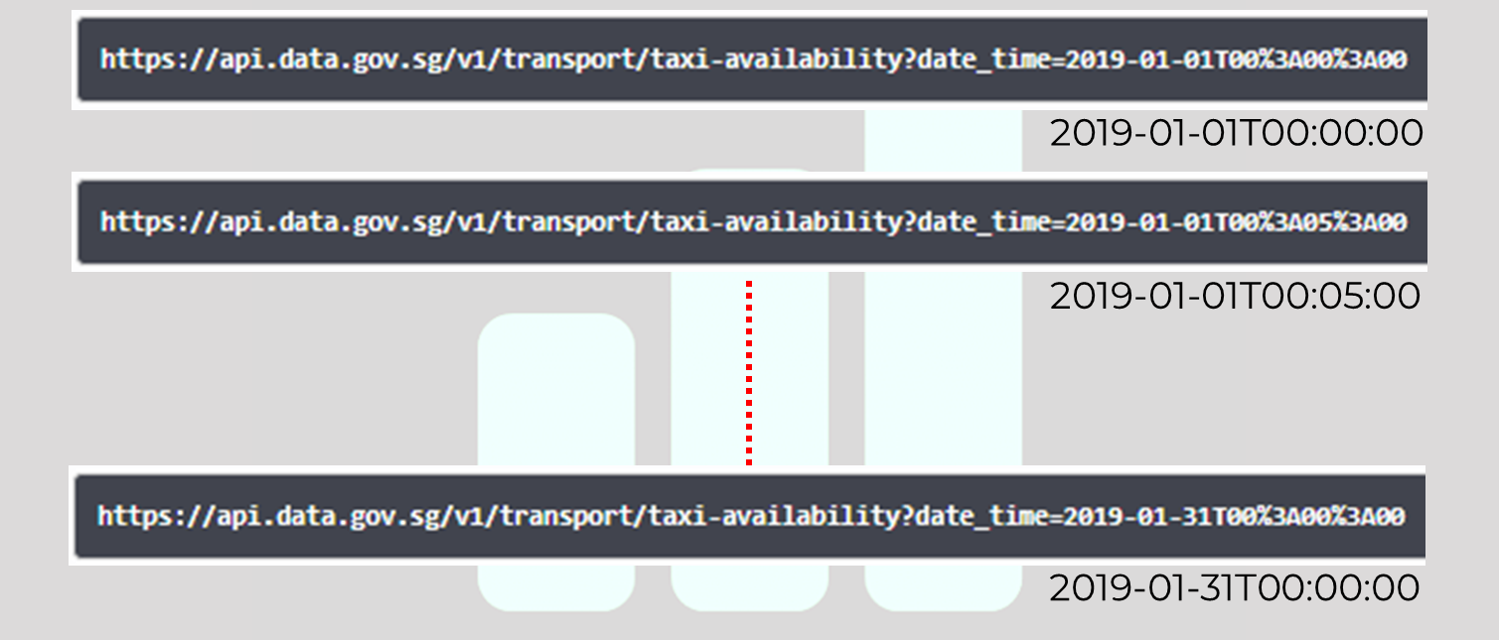

Do you see a pattern? There are two things to take note of:
1. each request URL has a part of a string that doesn't change (base URL)
2. each request URL has a string that <em>changes</em> (the datetime)

Also, in the request URL, the hours, minutes, and seconds are separated with a string "%3A". We will need to take that into account later on.

### Step 9: 
We are going to create a list containing all of the possible combinations of the date and time in 5-min intervals between 2019-01-01 and 2019-01-31.

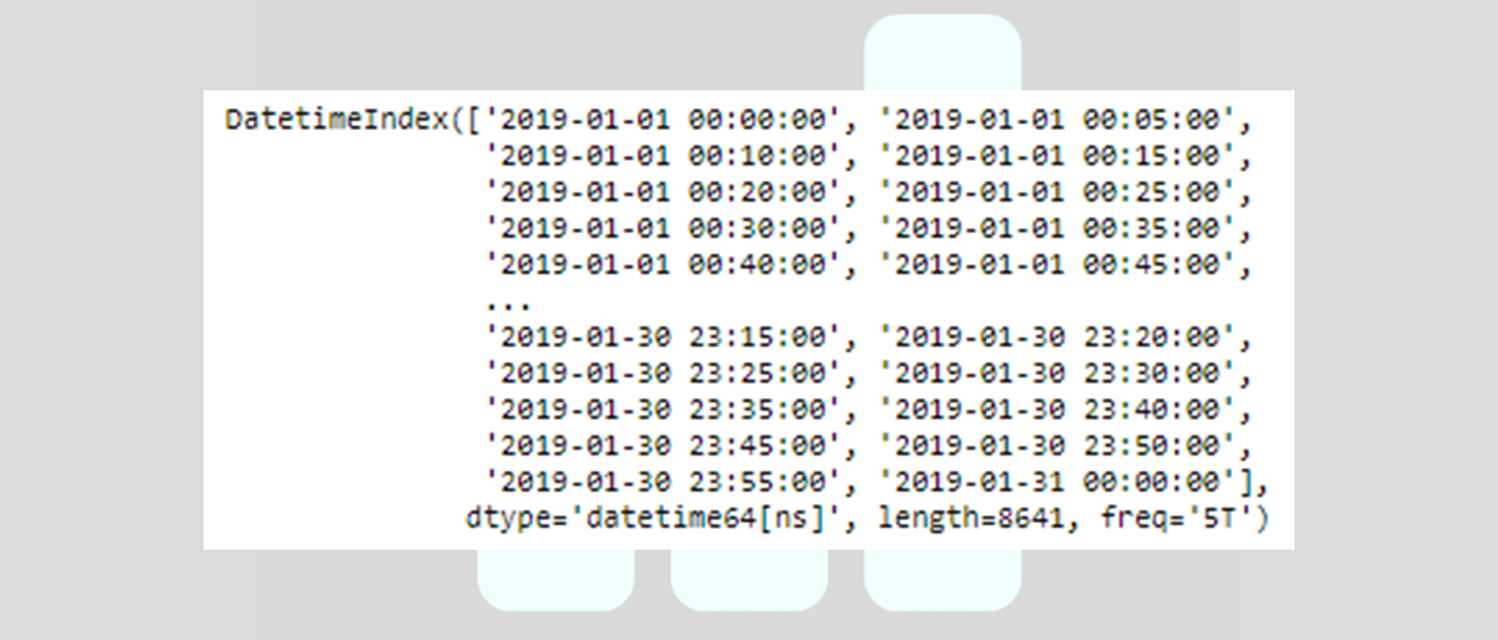

This is one possible way to do it, as long as you've a set of datetimes in 5-minute intervals it's fine.

<strong>Hint: Google "generate interval of dates pandas"</strong>

In [4]:
# Step 9: Generate a date range in 5-min intervals
date_range_5m = pd.date_range(start='2019-01-01', end='2019-02-01', freq='5min')
date_range_5m

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 00:05:00',
               '2019-01-01 00:10:00', '2019-01-01 00:15:00',
               '2019-01-01 00:20:00', '2019-01-01 00:25:00',
               '2019-01-01 00:30:00', '2019-01-01 00:35:00',
               '2019-01-01 00:40:00', '2019-01-01 00:45:00',
               ...
               '2019-01-31 23:15:00', '2019-01-31 23:20:00',
               '2019-01-31 23:25:00', '2019-01-31 23:30:00',
               '2019-01-31 23:35:00', '2019-01-31 23:40:00',
               '2019-01-31 23:45:00', '2019-01-31 23:50:00',
               '2019-01-31 23:55:00', '2019-02-01 00:00:00'],
              dtype='datetime64[ns]', length=8929, freq='5T')

In [6]:
# [list(map(int, row.split()[1:])) for row in text.split('\n')]

In [7]:
np.array([list(str(x).split()) for x in date_range_5m]).reshape(2,-1)

array([['2019-01-01', '00:00:00', '2019-01-01', ..., '2019-01-16',
        '11:55:00', '2019-01-16'],
       ['12:00:00', '2019-01-16', '12:05:00', ..., '23:55:00',
        '2019-02-01', '00:00:00']], dtype='<U10')

In [8]:
tanggal_list = np.array([list(str(x).split()) for x in date_range_5m]).T[0]
jam_list = np.array([list(str(x).split()) for x in date_range_5m]).T[1]

### Step 10: Generate a list of datetime in proper format for API
If you noticed in the list, it's still not quite suitable for using in calling the API. 

You'll need the list to containing the properly formatted date and time string. 

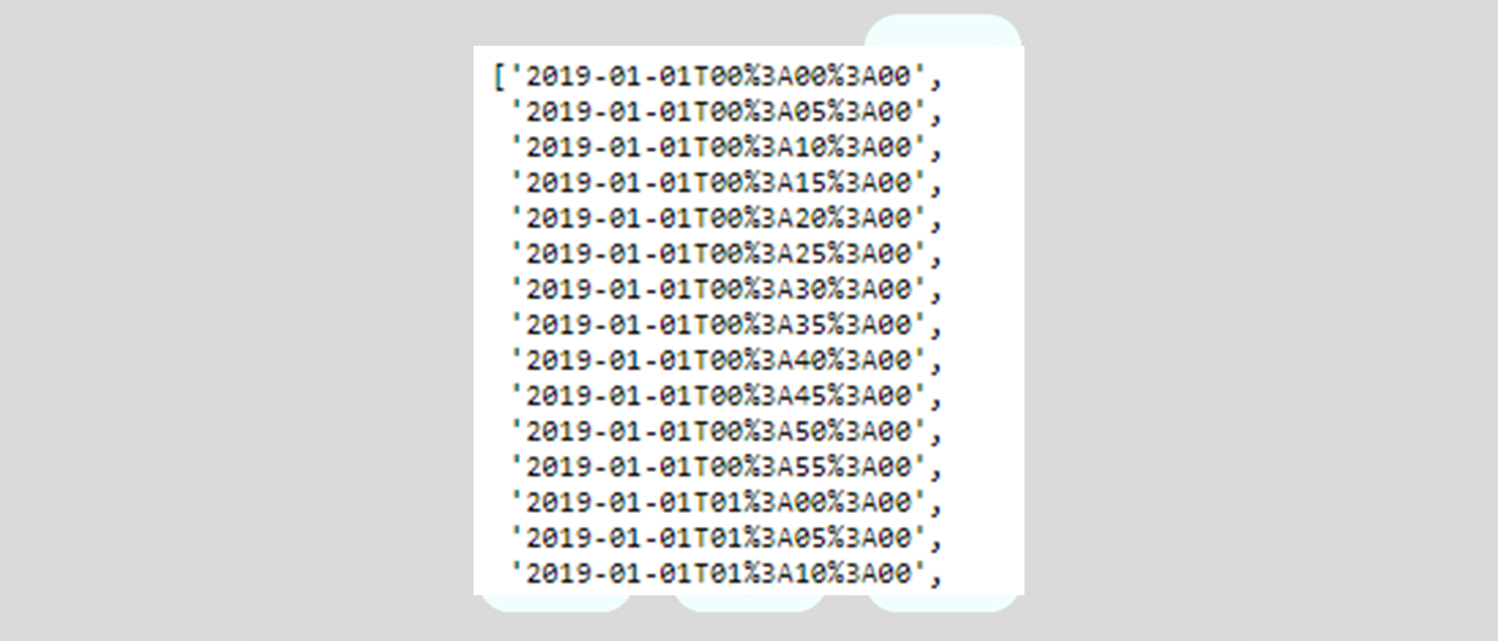

We will expect something like this. There are a few ways to do this, but here's a suggestion.

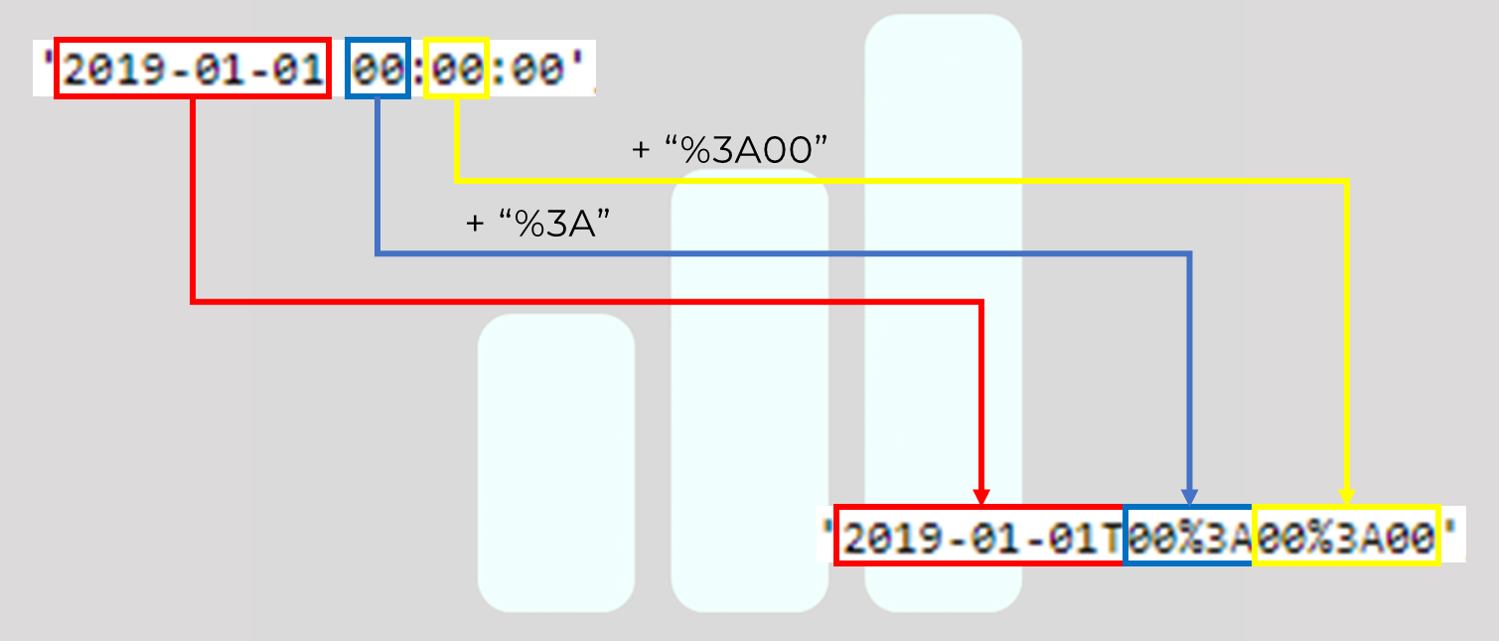

1. create a list containing your date, along with a string "T" in it
2. create a list containing your hour
3. create a list containing your minute
4. zip all of this list together with extra strings in the center

This part is a little tough, but you can do it!

<strong>Hint: Google "concatenate two lists element wise python" </strong>

In [9]:
date_range_string = [i+'T'+j for i,j in zip(tanggal_list,jam_list)]
date_range_string[:10]

['2019-01-01T00:00:00',
 '2019-01-01T00:05:00',
 '2019-01-01T00:10:00',
 '2019-01-01T00:15:00',
 '2019-01-01T00:20:00',
 '2019-01-01T00:25:00',
 '2019-01-01T00:30:00',
 '2019-01-01T00:35:00',
 '2019-01-01T00:40:00',
 '2019-01-01T00:45:00']

### Step 11: Make your API calls for the entire duration (takes 1-2 hours)
Let's make the API calls! This will take a while, around 1-2 hours depending on your Internet speed.

When you run this, make sure you have a bit of time to spare. But ater you're done with the entire call, it's just a few more lines to finishing up this Part I.

This is the sequence of events:
1. declare your base URL string
2. declare variable containing an empty list
3. use a for loop to loop through the list of strings containing dates
4. in each loop, combine the base URL string with the date
5. perform the API call
6. get the response, extract only the feature
7. turn that feature into a DataFrame
8. append the DataFrame into the list you initialized
9. after the entire loop, concatenate all of the DataFrames you have in the list into a combined DataFrame

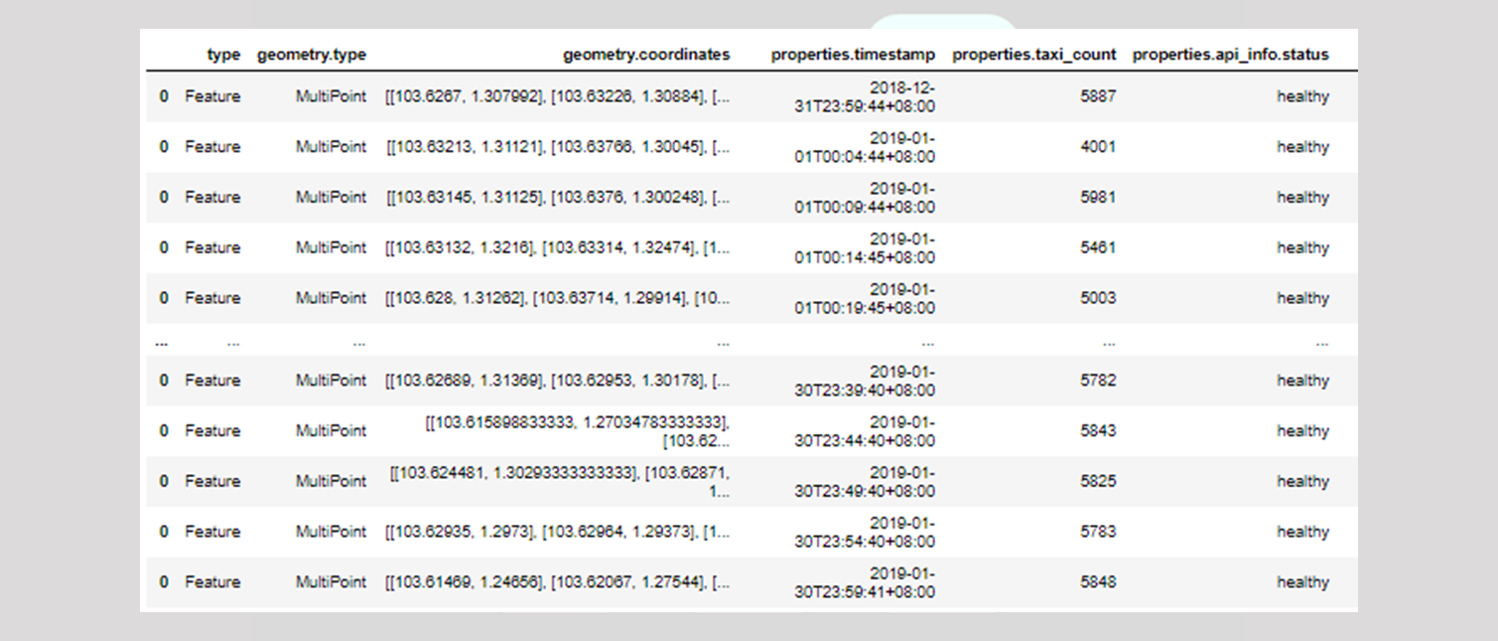

You'll see some thing like this.

<strong>Hint: String concatenation is your friend</strong>

<strong>Hint 2: Google "combine dataframe in list pandas"</strong>

In [120]:
url = 'https://api.data.gov.sg/v1/transport/taxi-availability?'
df_feature = pd.DataFrame()
data_list = []
for tanggal in tqdm(date_range_string[:-1]):
    mydict = {'date_time': tanggal}
    response = requests.get(url, params=mydict)
    data = json.loads(response.text)
    data_list.append(pd.json_normalize(data['features']))

100%|████████████████████████████████████████████████████████████████████████████| 8928/8928 [1:11:18<00:00,  2.09it/s]


In [122]:
df_taxi = pd.concat(data_list)
df_taxi.head()

type geometry.type                               geometry.coordinates  \
0  Feature    MultiPoint  [[103.6267, 1.307992], [103.63226, 1.30884], [...   
0  Feature    MultiPoint  [[103.63213, 1.31121], [103.63766, 1.30045], [...   
0  Feature    MultiPoint  [[103.63145, 1.31125], [103.6376, 1.300248], [...   
0  Feature    MultiPoint  [[103.63132, 1.3216], [103.63314, 1.32474], [1...   
0  Feature    MultiPoint  [[103.628, 1.31262], [103.63714, 1.29914], [10...   

        properties.timestamp  properties.taxi_count properties.api_info.status  
0  2018-12-31T23:59:44+08:00                   5887                    healthy  
0  2019-01-01T00:04:44+08:00                   4001                    healthy  
0  2019-01-01T00:09:44+08:00                   5981                    healthy  
0  2019-01-01T00:14:45+08:00                   5461                    healthy  
0  2019-01-01T00:19:45+08:00                   5003                    healthy

In [126]:
df_taxi = df_taxi.reset_index().drop(columns=['index']).rename(columns={'geometry.coordinates':'geometry_coordinates','geometry.type':'geometry_type','properties.timestamp':'properties_timestamp','properties.taxi_count':'properties_taxi_count','properties.api_info.status':'properties_api_info_status'})
df_taxi.head()

type geometry_type                               geometry_coordinates  \
0  Feature    MultiPoint  [[103.6267, 1.307992], [103.63226, 1.30884], [...   
1  Feature    MultiPoint  [[103.63213, 1.31121], [103.63766, 1.30045], [...   
2  Feature    MultiPoint  [[103.63145, 1.31125], [103.6376, 1.300248], [...   
3  Feature    MultiPoint  [[103.63132, 1.3216], [103.63314, 1.32474], [1...   
4  Feature    MultiPoint  [[103.628, 1.31262], [103.63714, 1.29914], [10...   

        properties_timestamp  properties_taxi_count properties_api_info_status  
0  2018-12-31T23:59:44+08:00                   5887                    healthy  
1  2019-01-01T00:04:44+08:00                   4001                    healthy  
2  2019-01-01T00:09:44+08:00                   5981                    healthy  
3  2019-01-01T00:14:45+08:00                   5461                    healthy  
4  2019-01-01T00:19:45+08:00                   5003                    healthy

In [127]:
df_taxi.to_csv('df_taxi.csv',index=False)

In [ ]:
# [Use this guide if you're stuck] Step 11
# declare the base URL

# declare the empty list


# use a for loop in the list you got from Step 10

    # combine the base_url and the current date in the for loop
    
    # make a get request using the combined URL
    
    # get the JSON from the response of the get request
    
    # declare a variable which contains only the 'features' part of the JSON response
    
    # turn the variable into a DataFrame
    
    # append the dataframe into the empty list above
    

# concatenate all of the dataframes you appended into the empty list


### Step 12: Create a new column "time" in the new DataFrame
Well done! Hope that didn't take long. 

Now that we've this exciting new DataFrame, we'll need to do one more thing - create a new column called time containing the date and time. Just use the list that you got from Step 9.

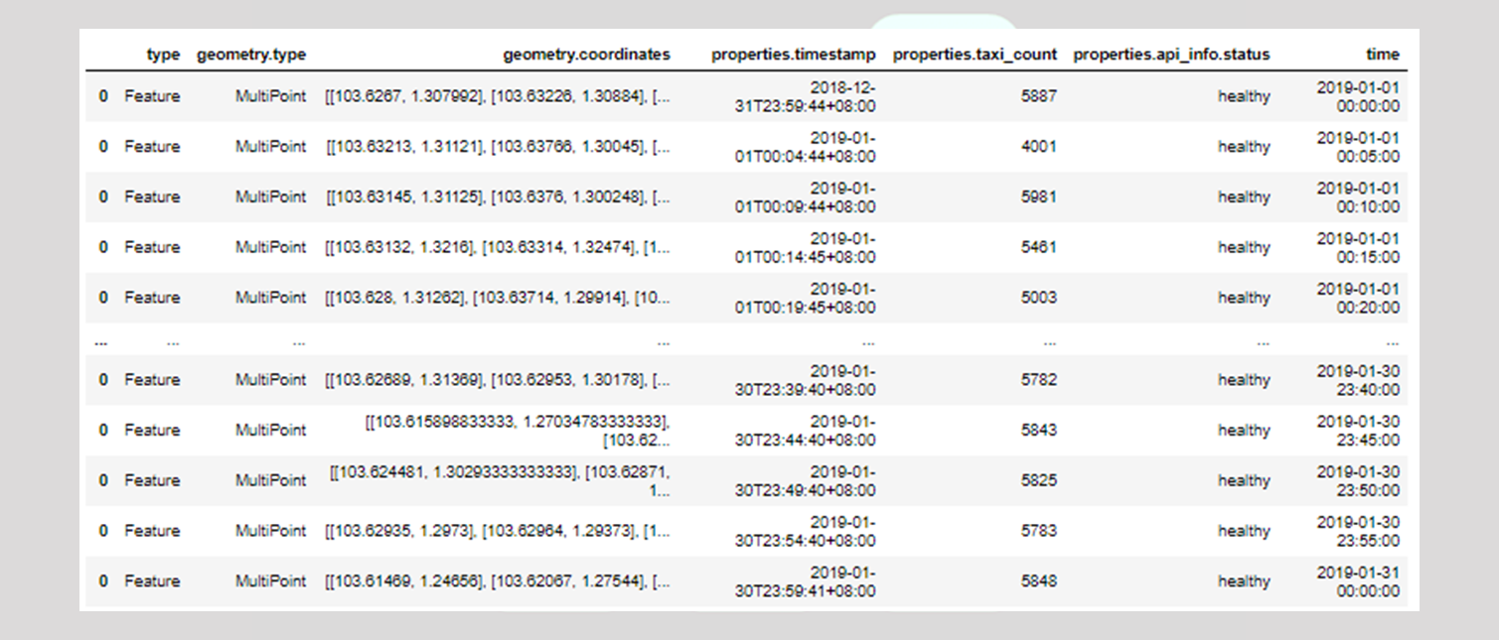

A few checks at the end after you're done:
1. 7 columns
2. 8,641 rows

In [16]:
date_range_5m

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 00:05:00',
               '2019-01-01 00:10:00', '2019-01-01 00:15:00',
               '2019-01-01 00:20:00', '2019-01-01 00:25:00',
               '2019-01-01 00:30:00', '2019-01-01 00:35:00',
               '2019-01-01 00:40:00', '2019-01-01 00:45:00',
               ...
               '2019-01-31 23:15:00', '2019-01-31 23:20:00',
               '2019-01-31 23:25:00', '2019-01-31 23:30:00',
               '2019-01-31 23:35:00', '2019-01-31 23:40:00',
               '2019-01-31 23:45:00', '2019-01-31 23:50:00',
               '2019-01-31 23:55:00', '2019-02-01 00:00:00'],
              dtype='datetime64[ns]', length=8929, freq='5T')

In [13]:
df_taxi = pd.read_csv('df_taxi.csv')
df_taxi.head()

type geometry_type                               geometry_coordinates  \
0  Feature    MultiPoint  [[103.6267, 1.307992], [103.63226, 1.30884], [...   
1  Feature    MultiPoint  [[103.63213, 1.31121], [103.63766, 1.30045], [...   
2  Feature    MultiPoint  [[103.63145, 1.31125], [103.6376, 1.300248], [...   
3  Feature    MultiPoint  [[103.63132, 1.3216], [103.63314, 1.32474], [1...   
4  Feature    MultiPoint  [[103.628, 1.31262], [103.63714, 1.29914], [10...   

        properties_timestamp  properties_taxi_count  \
0  2018-12-31T23:59:44+08:00                   5887   
1  2019-01-01T00:04:44+08:00                   4001   
2  2019-01-01T00:09:44+08:00                   5981   
3  2019-01-01T00:14:45+08:00                   5461   
4  2019-01-01T00:19:45+08:00                   5003   

  properties_api_info_status        time  
0                    healthy  2019-02-01  
1                    healthy  2019-02-01  
2                    healthy  2019-02-01  
3                    healthy  2019-02-01  
4                    healthy  2019-02-01

In [18]:
# Step 12: create the 'time' column and assign it with the list from Step 9
df_taxi['time'] = date_range_5m[:-1]
df_taxi.head()

type geometry_type                               geometry_coordinates  \
0  Feature    MultiPoint  [[103.6267, 1.307992], [103.63226, 1.30884], [...   
1  Feature    MultiPoint  [[103.63213, 1.31121], [103.63766, 1.30045], [...   
2  Feature    MultiPoint  [[103.63145, 1.31125], [103.6376, 1.300248], [...   
3  Feature    MultiPoint  [[103.63132, 1.3216], [103.63314, 1.32474], [1...   
4  Feature    MultiPoint  [[103.628, 1.31262], [103.63714, 1.29914], [10...   

        properties_timestamp  properties_taxi_count  \
0  2018-12-31T23:59:44+08:00                   5887   
1  2019-01-01T00:04:44+08:00                   4001   
2  2019-01-01T00:09:44+08:00                   5981   
3  2019-01-01T00:14:45+08:00                   5461   
4  2019-01-01T00:19:45+08:00                   5003   

  properties_api_info_status                time  
0                    healthy 2019-01-01 00:00:00  
1                    healthy 2019-01-01 00:05:00  
2                    healthy 2019-01-01 00:10:00  
3                    healthy 2019-01-01 00:15:00  
4                    healthy 2019-01-01 00:20:00

In [15]:
df_taxi.time[0]

'2019-02-01'

### Step 13: Export your DataFrame as CSV 
Congrats and very well done! It was tough but you perservered and did it. 

You've successfully called an API and collected your own data. Now it's time to export your DataFrame into a CSV format so that you can continue in Part II.

We don't need the index to be exported so don't forget the additional argument. 

<strong>Hint: Google "export dataframe to csv"</strong>

In [19]:
# Step 13: Export your DataFrame to CSV
df_taxi.to_csv('df_taxi.csv',index=False)

### What's next? 
Head on to Part II for the next part of your adventure! 